In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# json 파일 처리
import json

In [5]:
# 파일 존재 여부 확인용
import os

In [6]:
# 모델
import tensorflow as tf
from tensorflow import keras

In [7]:
from sklearn.metrics import confusion_matrix

# 변수 목록

In [8]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [9]:
test_dir_name = "./Dataset/Train-Test/Female/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [10]:
label_name = ['Traditional',
              'Manish',
              'Feminine',
              'Ethnic',
              'Contemporary',
              'Natural',
              'Gender-Fluid',
              'Sporty',
              'Subculture',
              'Casual']

# 평가할 모델의 버전 지정

In [11]:
model_path = model_dir_name + 'fashion_classification_female_0123_03.keras'

# Test 데이터 불러오기

In [ ]:
x_test = []
y_test = []

for i in range(0, 2001):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Json/" + str(i) + ".json"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break


    x_test.append(img_file)
    y_test.append(label_file)


    if len(y_test)%500 == 0: # 진행도 확인용
        print(str(len(y_test)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
Complete


# 학습을 위해 X,Y 데이터 형식 변경

In [ ]:
x_test = np.array(x_test)
x_test.shape

(2000, 200, 200, 3)

In [ ]:
y_test_ori = y_test[:]
y_test = []

for item in y_test_ori:
  num = label_name.index(item['Labeling'])
  y_test.append(num)

print(y_test[0])

8


In [ ]:
y_test = np.array(y_test)
y_test.shape

(2000,)

In [ ]:
y_test = y_test.astype('uint8')
y_test.dtype

dtype('uint8')

# Test 데이터 통계

In [ ]:
# 라벨 개수 카운트
label_count = {}

for item in y_test:
  label = label_name[item]
  if label not in label_count: # 해당 키가 없을 경우
    label_count[label] = 1
  else:
    label_count[label] = label_count[label]+1


# 내림차순 정렬
label_count = sorted(label_count.items(), key= lambda item:item[1], reverse=True)

label_count_labels = []
label_count_values = []

for item in label_count:
    label_count_labels.append(item[0])
    label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
total = np.sum(label_count_values)
label_count_labels_ratio = []

for i in range(0, len(label_count_labels)):
    ratio = (label_count_values[i]/total) * 100

    new_label = label_count_labels[i] + (' %.1f%%' % ratio)
    label_count_labels_ratio.append(new_label)


# 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
barplot = plt.bar(label_count_labels, label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot) :
    plt.text(i, j.get_height() + 0.5, label_count_values[i], ha = 'center')

plt.subplot(1, 2, 2)
plt.pie(label_count_values, startangle=90, counterclock=False)
plt.legend(label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Test Data Labeling Count")
plt.show()

# 모델 예측 진행

In [12]:
saved_model = keras.models.load_model(model_path)
saved_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

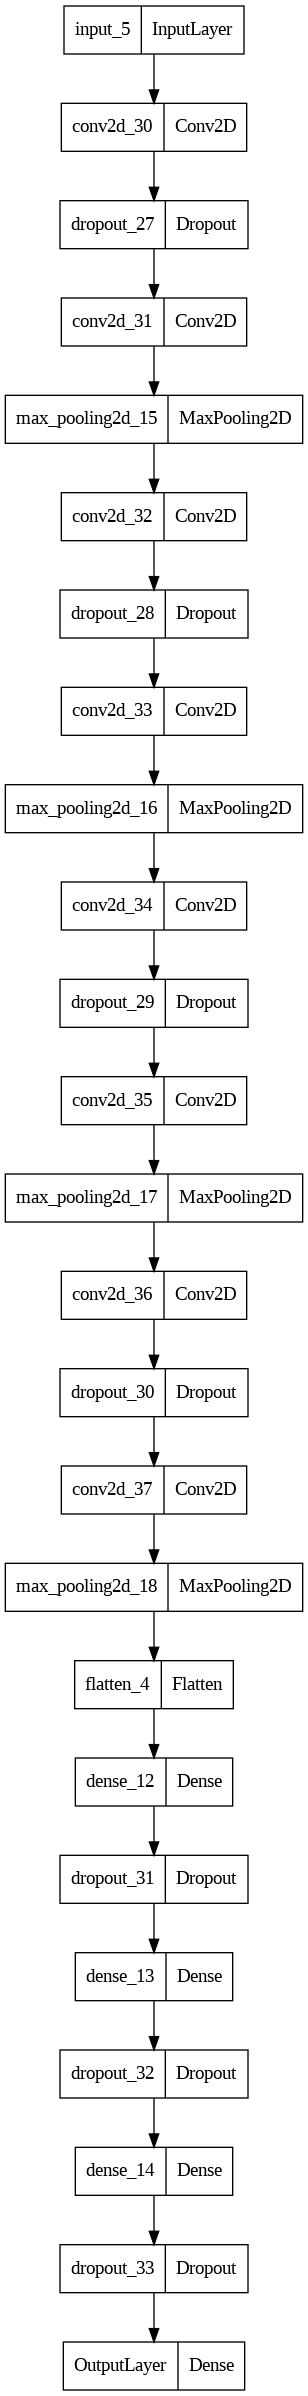

In [13]:
keras.utils.plot_model(saved_model)

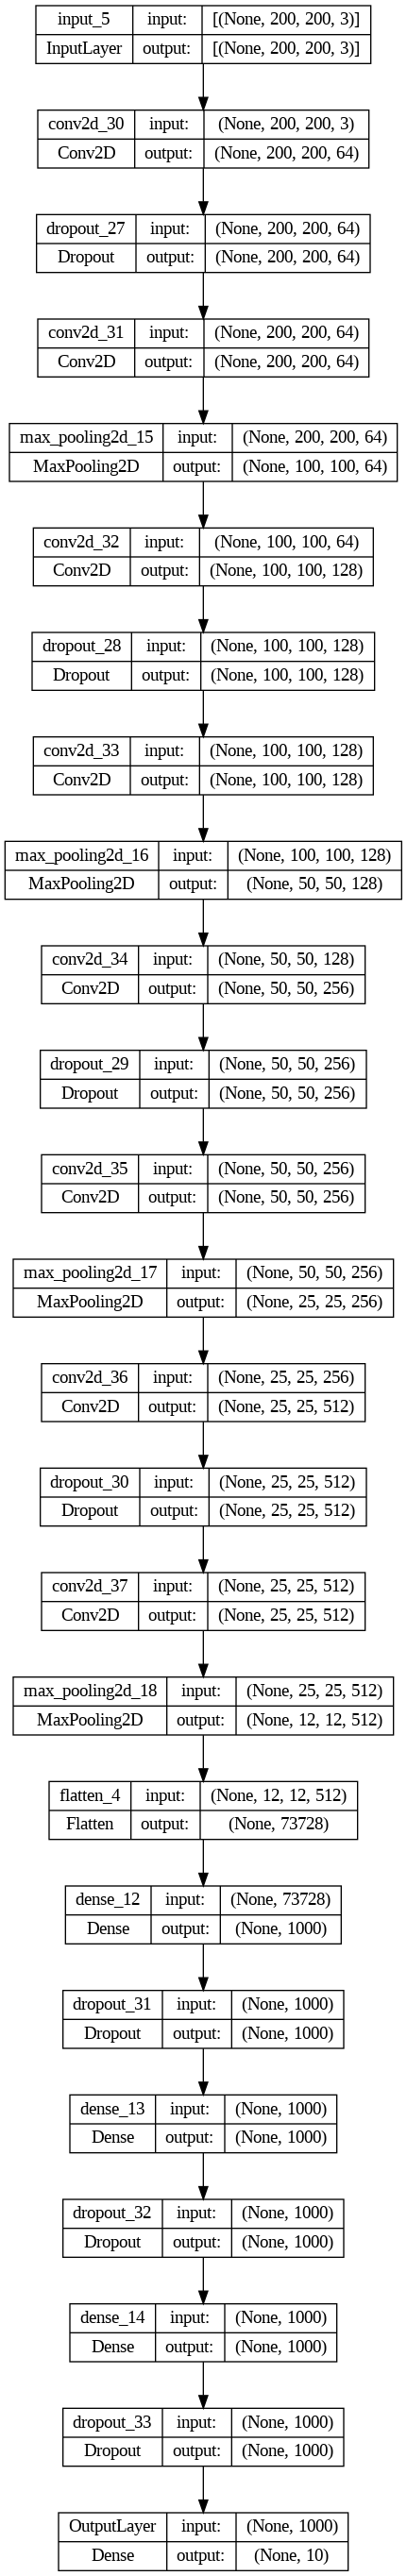

In [14]:
keras.utils.plot_model(saved_model, show_shapes=True)

In [ ]:
 saved_model.evaluate(x_test, y_test)

63/63 [==============================] - 620s 10s/step - loss: 1.9378 - sparse_categorical_accuracy: 0.3745


[1.9377845525741577, 0.37450000643730164]

# 상세 분류 결과 평가

In [ ]:
y_true = y_test[:]

y_pred = saved_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred.shape)

63/63 [==============================] - 626s 10s/step
(2000,)


In [ ]:
y_pred[0]

5

## 분류 결과 개수 시각화

In [ ]:
# 라벨 개수 카운트
true_label_count = {}
pred_label_count = {}

for item in y_true:
  label = label_name[item]
  if label not in true_label_count: # 해당 키가 없을 경우
    true_label_count[label] = 1
  else:
    true_label_count[label] = true_label_count[label]+1

for item in y_pred:
  label = label_name[item]
  if label not in pred_label_count: # 해당 키가 없을 경우
    pred_label_count[label] = 1
  else:
    pred_label_count[label] = pred_label_count[label]+1


# 내림차순 정렬
true_label_count = sorted(true_label_count.items(), key= lambda item:item[1], reverse=True)

true_label_count_labels = []
true_label_count_values = []

for item in true_label_count:
    true_label_count_labels.append(item[0])
    true_label_count_values.append(item[1])

pred_label_count = sorted(pred_label_count.items(), key= lambda item:item[1], reverse=True)

pred_label_count_labels = []
pred_label_count_values = []

for item in pred_label_count:
    pred_label_count_labels.append(item[0])
    pred_label_count_values.append(item[1])


# 파이 차트를 위한 라벨링 생성
true_total = np.sum(true_label_count_values)
true_label_count_labels_ratio = []

for i in range(0, len(true_label_count_labels)):
    ratio = (true_label_count_values[i]/true_total) * 100

    true_new_label = true_label_count_labels[i] + (' %.1f%%' % ratio)
    true_label_count_labels_ratio.append(true_new_label)

pred_total = np.sum(pred_label_count_values)
pred_label_count_labels_ratio = []

for i in range(0, len(pred_label_count_labels)):
    ratio = (pred_label_count_values[i]/pred_total) * 100

    pred_new_label = pred_label_count_labels[i] + (' %.1f%%' % ratio)
    pred_label_count_labels_ratio.append(pred_new_label)


print("Complete")

Complete


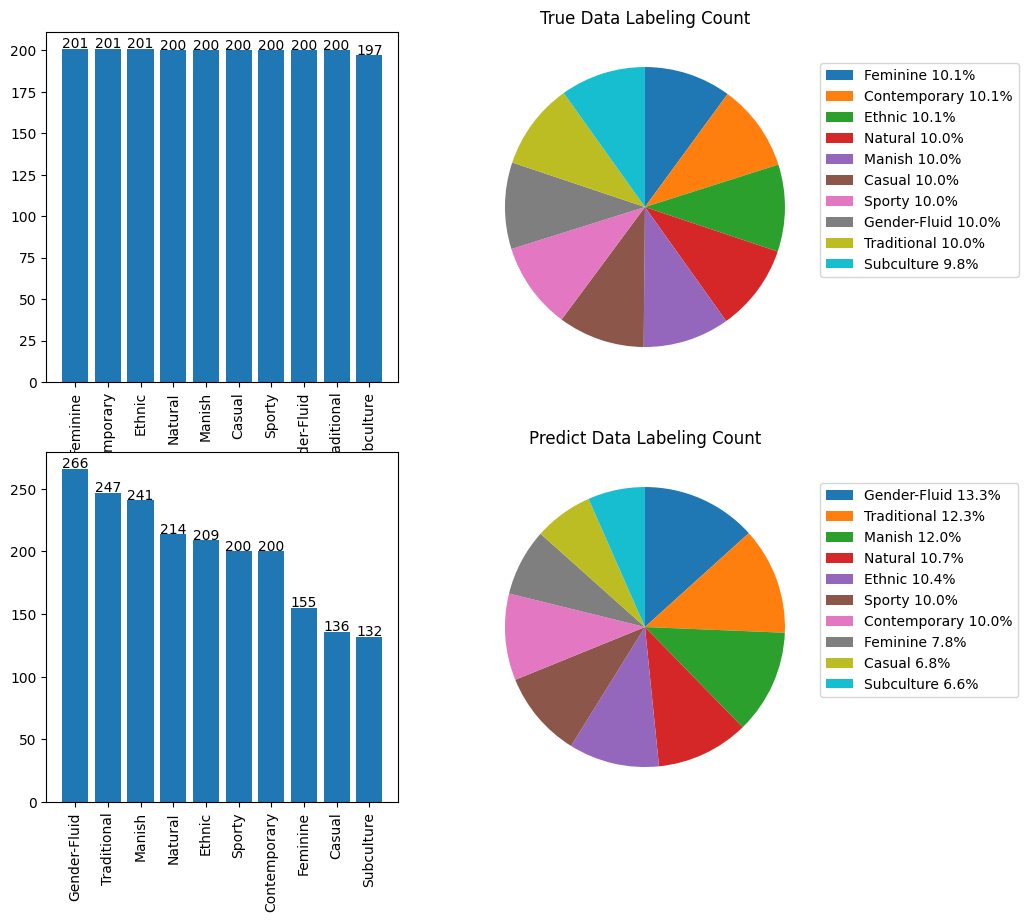

In [ ]:
# 차트 그리기
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
true_barplot = plt.bar(true_label_count_labels, true_label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(true_barplot) :
    plt.text(i, j.get_height() + 0.5, true_label_count_values[i], ha = 'center')

plt.subplot(2, 2, 2)
plt.pie(true_label_count_values, startangle=90, counterclock=False)
plt.legend(true_label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("True Data Labeling Count")


plt.subplot(2, 2, 3)
pred_barplot = plt.bar(pred_label_count_labels, pred_label_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(pred_barplot) :
    plt.text(i, j.get_height() + 0.5, pred_label_count_values[i], ha = 'center')

plt.subplot(2, 2, 4)
plt.pie(pred_label_count_values, startangle=90, counterclock=False)
plt.legend(pred_label_count_labels_ratio, loc=(1.0, 0.3))

plt.title("Predict Data Labeling Count")

plt.show()

# Confusion Matrix

In [ ]:
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[102  16   7   7  15   7  19   6   6  15]
 [ 21  85   4   6  15  14  37   4   5   9]
 [ 17  16  55  25  18  35  13   6   9   7]
 [ 19  10  15  76  12  22  10  10  12  15]
 [ 22  18  21  16  62  17  13  13  13   6]
 [ 13  13  18  25  22  68  17  10   7   7]
 [ 17  32   2   8  11   7  94  14   8   7]
 [  7  13   8   7  11  12  18 104  10  10]
 [ 12  12  14  22  18  20  18  16  54  11]
 [ 17  26  11  17  16  12  27  17   8  49]]


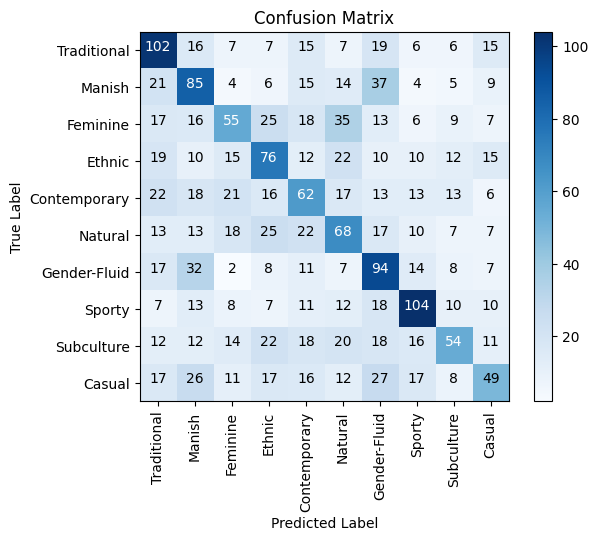

In [ ]:
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

tick_marks = np.arange(len(label_name))
plt.xticks(tick_marks, label_name, rotation=90)
plt.yticks(tick_marks, label_name)

for i in range(matrix.shape[0]):
  for j in range(matrix.shape[1]):
    plt.text(j, i, matrix[i, j], horizontalalignment="center", color="white" if matrix[i, j] > matrix.max()/2 else "black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

# GRAD-CAM 시각화

## 시각화할 이미지 불러오기

In [ ]:
# 각 예층 라벨링별로 이미지 10개 추출
vis_img = {}
for i in range(0, 10):
  vis_img[i] = []

flag = {}
for i in range(0, 10):
  flag[i] = False

i = 0

total_flag = False
while not total_flag:
  check = y_pred[i]
  if flag[check]: # 이미 이미지 10개가 다 차있으면
    i = i+1
    continue

  # 아직 10개가 안차있으면
  vis_img[check].append(x_test[i])
  if len(vis_img[check]) == 10:
    flag[check] = True

  total_flag = True
  for j in range(0, 10):
    if not flag[j]:
      total_flag = False

  i = i+1

print("Complete")

Complete


In [ ]:
for i in range(0, 10):
  vis_img[i] = np.array(vis_img[i])
  print(vis_img[i].shape)

(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)
(10, 200, 200, 3)


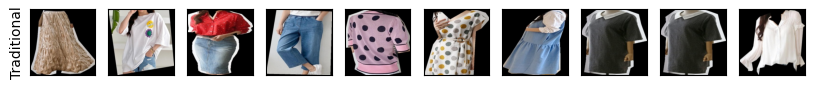

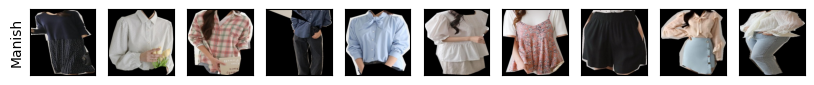

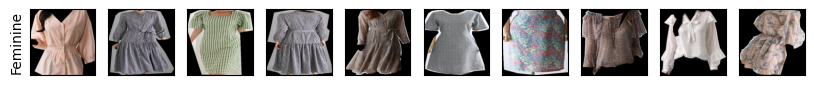

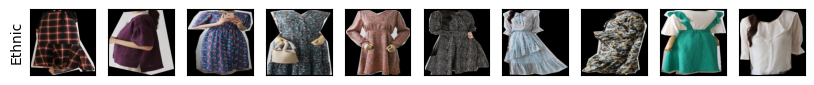

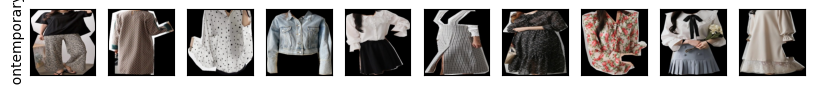

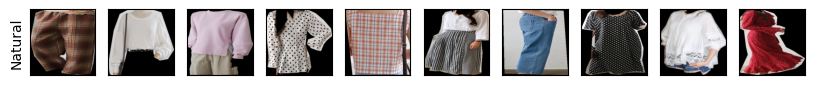

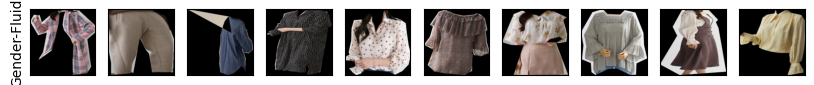

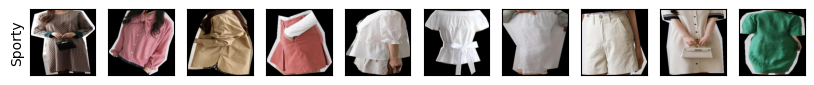

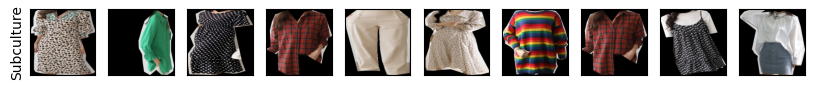

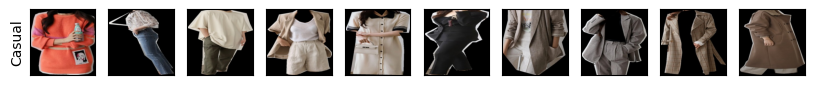

In [ ]:
# 시각화할 이미지들 출력
for i in range(0, 10): # 라벨링이 10개
  plt.figure(figsize=(10, 10))
  for j in range(0, 10): # 각 라벨링당 이미지 10개
    plt.subplot(1, 10, j+1)

    if j==0:
      plt.ylabel(label_name[i])

    plt.xticks([])
    plt.yticks([])
    rgb_img = cv2.cvtColor(vis_img[i][j], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)

  plt.show()

## GRAD-CAM 히트맵 생성

In [ ]:
saved_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

In [ ]:
# 입력: 이미지 array, 모델, 모델의 마지막 conv 레이어 이름
# 출력: heatmap array
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    heatmap_array = []

    # 마지막 feature maps에 대한 모델의 미분을 계산하기위해,
    # 마지막 feature maps와 모델의 최종예측값을 동시에 출력하는 모델을 새롭게 정의
    # 출력 형태에 last_conv_layer의 output이 새로 추가되었다
    grad_model = keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    for i in range(0, len(img_array)):
      # 모델에 이미지를 입력하고, 마지막 feature maps와 최종 예측값을 구하는 연산과정을
      # Computational graph라는 형태로 저장한다. 미분값을 계산하기 위함이다.
      with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array[i:i+1])
          # 미분(더 정확히는 그레디언트)는 한 개의 예측값에 대해서 계산할 수 있기 때문에
          # 가장 확률값이 큰 예측값에 대응하는 클래스 (혹은 함수의 인자로 전달한 클래스)만을 고려할 것이다. -> class_channel
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          class_channel = preds[:, pred_index]

      # 모델의 어떤 한 클래스에 대한 예측값(class_channel)을 마지막 feature maps(last_conv_layer_output)으로 미분한다.
      grads = tape.gradient(class_channel, last_conv_layer_output)

      # 마지막 feature maps은 여러 개의 채널을 갖고 있다. [데이터 개수, 높이, 너비, 채널]
      # 각 채널마다 등장한 미분값들을 평균 내려주자. (채널의 중요도를 결정)
      pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

      # 우리는 마지막 feature maps에서 중요한 위치를 알고 싶다.
      # 하지만 채널 개수가 많기 때문에 어떤 위치가 중요한지 결정해줘야 한다.
      # 채널의 중요도를 가중치로 가중합을 해주자 ([높이, 너비, 1]가 됨)
      last_conv_layer_output = last_conv_layer_output[0]
      # @는 행렬곱 연산이다. 축을 잘 맞춰줌으로써 행렬곱이 곧 가중합 연산이 되도록 한 것이다.
      heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
      heatmap = tf.squeeze(heatmap)  # 축 쥐어짜서 (squeeze) 없애주기 ([높이, 너비, 1] -> [높이, 너비]가 됨)

      # 0과 1사이 값으로 만들어주기
      heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
      heatmap_array.append(heatmap.numpy())


    return heatmap_array

In [ ]:
heatmap = {}

for i in range(0, 10):
  print(str(i+1) + "번째 라벨 분석중...")
  heatmap[i] = make_gradcam_heatmap(vis_img[i], saved_model, 'conv2d_37', pred_index=i)

print("Complete")

1번째 라벨 분석중...
2번째 라벨 분석중...
3번째 라벨 분석중...
4번째 라벨 분석중...
5번째 라벨 분석중...
6번째 라벨 분석중...
7번째 라벨 분석중...
8번째 라벨 분석중...
9번째 라벨 분석중...
10번째 라벨 분석중...
Complete


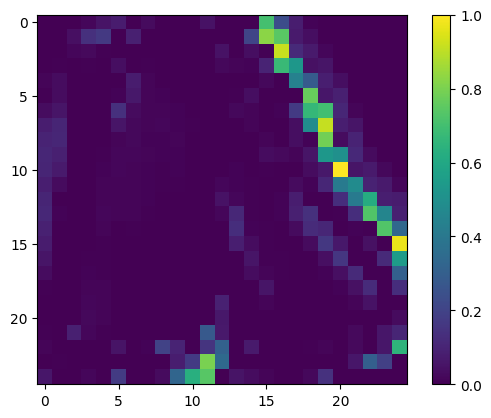

In [ ]:
plt.imshow(heatmap[0][0]);
plt.colorbar()
plt.show()

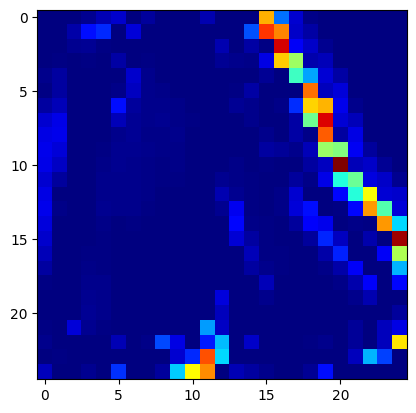

In [ ]:
# RGB 형식으로 변환

heatmap_rgb = np.uint8(255 * heatmap[0][0]) # 히트맵의 0~1값을 0~255값으로 변환
heatmap_rgb = cv2.applyColorMap(heatmap_rgb , cv2.COLORMAP_JET)
heatmap_rgb = cv2.cvtColor(heatmap_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(heatmap_rgb)
plt.show()

## 생성된 히트맵을 원본 이미지와 합성

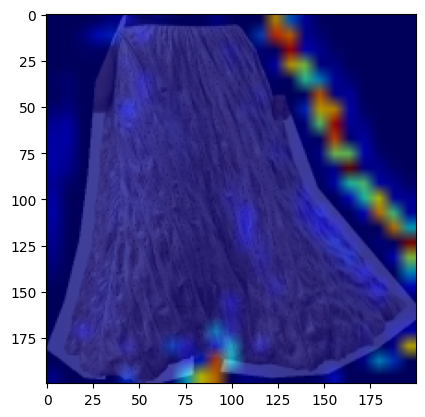

In [ ]:
rgb_img = cv2.cvtColor(vis_img[0][0], cv2.COLOR_BGR2RGB)

rgb_heatmap = np.uint8(255 * heatmap[0][0]) # 히트맵의 0~1값을 0~255값으로 변환
rgb_heatmap = cv2.applyColorMap(rgb_heatmap , cv2.COLORMAP_JET)
rgb_heatmap = cv2.cvtColor(rgb_heatmap, cv2.COLOR_BGR2RGB)
rgb_heatmap = cv2.resize(rgb_heatmap, (img_width , img_height))

superimposed_img = cv2.addWeighted(rgb_img, 0.3, rgb_heatmap, 0.7, 0)
superimposed_img = np.uint8(superimposed_img)

plt.imshow(superimposed_img)
plt.show()

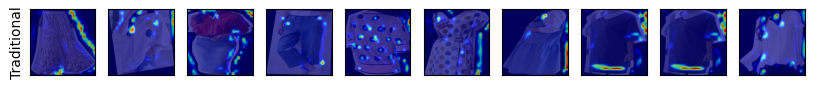

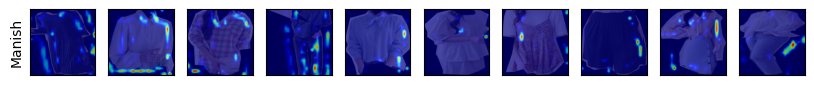

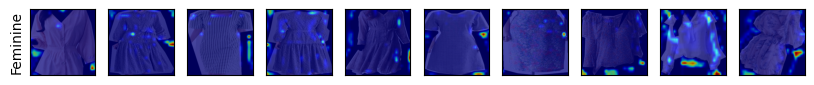

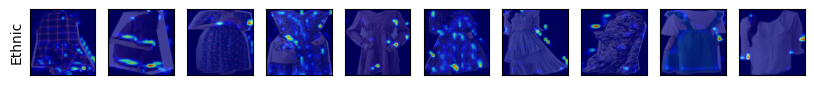

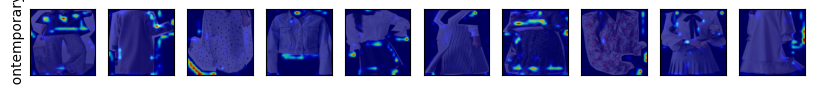

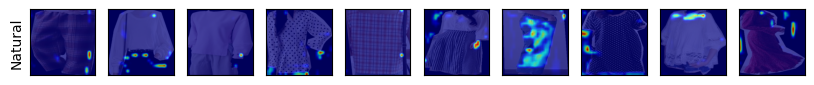

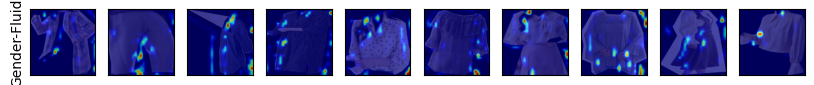

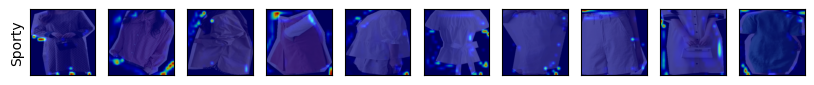

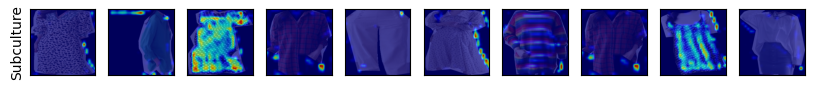

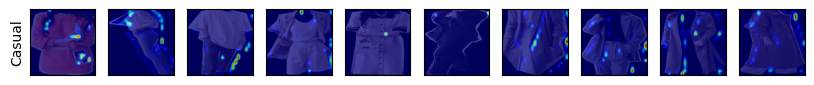

In [ ]:
for i in range(0, 10): # 라벨링이 10개
  plt.figure(figsize=(10, 10))
  for j in range(0, 10): # 각 라벨링당 이미지 10개
    plt.subplot(1, 10, j+1)

    # 원본 이미지를 rgb형식으로 변환
    rgb_img = cv2.cvtColor(vis_img[i][j], cv2.COLOR_BGR2RGB)

    # 합성을 위해 히트맵 이미지와 원본 이미지 크기 맞추기
    heatmap_resize = cv2.resize(heatmap[i][j], (img_width , img_height))

    # heatmap을 컬러 이미지로 변환하고 RGB 변환
    heatmap_resize = np.uint8(255 * heatmap_resize) # 히트맵의 0~1값을 0~255값으로 변환
    heatmap_resize = cv2.applyColorMap(heatmap_resize , cv2.COLORMAP_JET)
    heatmap_resize = cv2.cvtColor(heatmap_resize, cv2.COLOR_BGR2RGB)

    # 기존 이미지와 히트맵 이미지를 합성
    superimposed_img = cv2.addWeighted(rgb_img, 0.3, heatmap_resize, 0.7, 0)
    superimposed_img = np.uint8(superimposed_img)

    # 그래프 출력
    if j==0:
      plt.ylabel(label_name[i])

    plt.xticks([])
    plt.yticks([])
    plt.imshow(superimposed_img)

  plt.show()